In [171]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Assumptions

#### -Money is in Dollars

In [156]:
df = pd.read_csv("./data/transaction_df.csv", index_col=0)

## Question 2: Plot

#### Plot a histogram of the processed amounts of each transaction, the transactionAmount column.

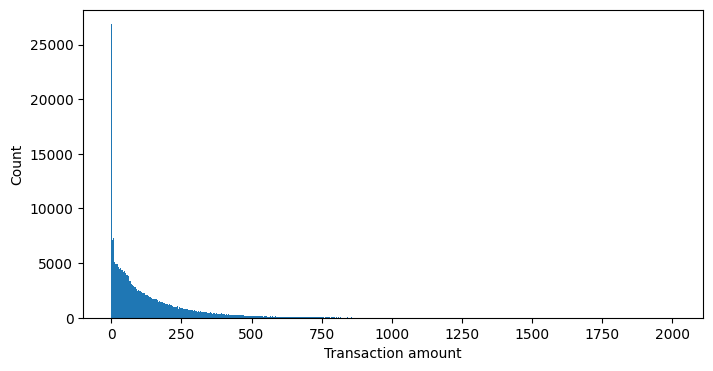

In [13]:
fig, ax = plt.subplots(figsize =(8, 4))
min_transaction_amt = int(min(df["transactionAmount"]))
max_transaction_amt = int(max(df["transactionAmount"]))
ax.hist(df["transactionAmount"],bins=range(min_transaction_amt, max_transaction_amt))
plt.xlabel("Transaction amount")
plt.ylabel("Count")
plt.show()

#### Report any structure you find and any hypotheses you have about that structure.

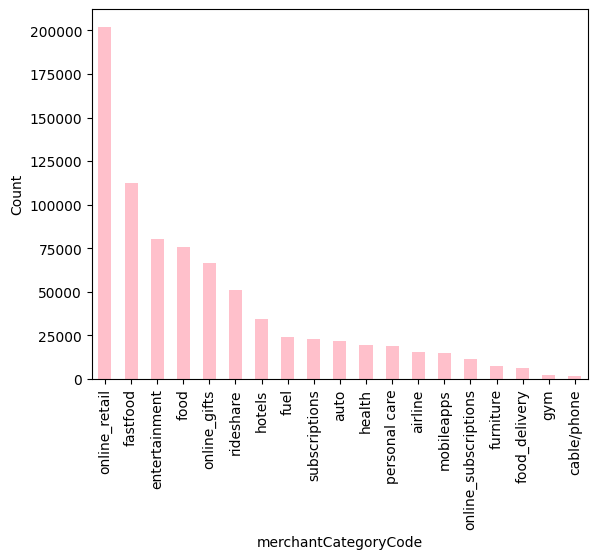

In [166]:
ax = df['merchantCategoryCode'].value_counts().plot(kind='bar', color="pink")
plt.xlabel("merchantCategoryCode")
plt.ylabel("Count")
plt.show()

Text(0, 0.5, 'Count')

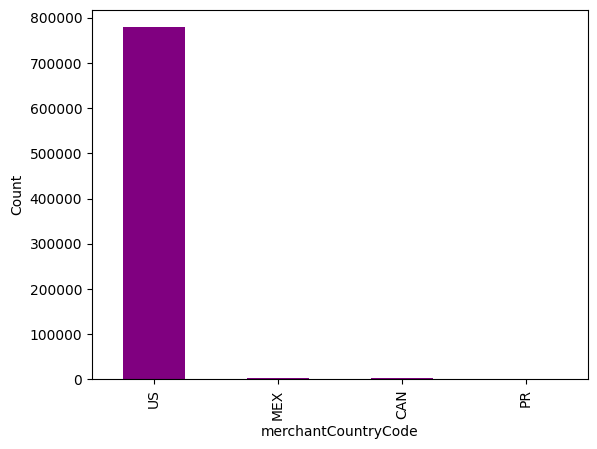

In [167]:
ax = df['merchantCountryCode'].value_counts().plot(kind='bar', color="purple")
plt.xlabel("merchantCountryCode")
plt.ylabel("Count")

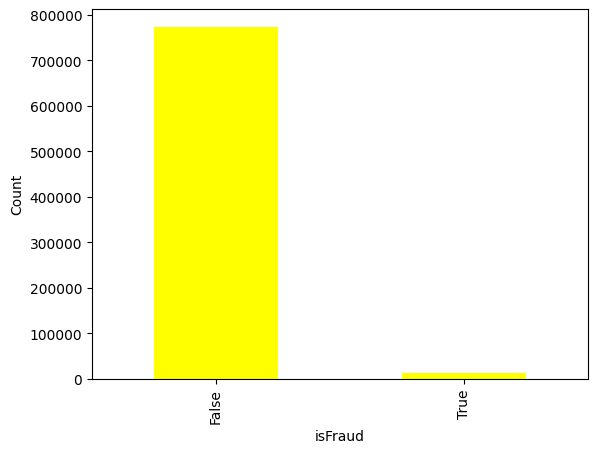

In [168]:
ax = df['isFraud'].value_counts().plot(kind='bar', color="yellow")
plt.xlabel("isFraud")
plt.ylabel("Count")
plt.show()

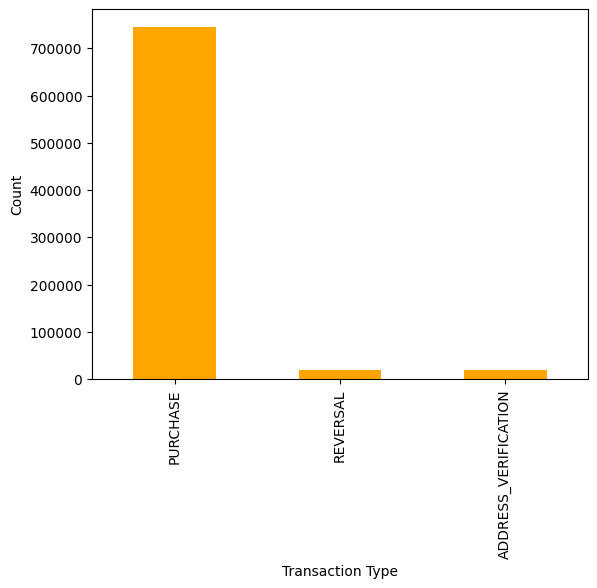

In [169]:
ax = df['transactionType'].value_counts().plot(kind='bar', color="orange")
plt.xlabel("Transaction Type")
plt.ylabel("Count")
plt.show()

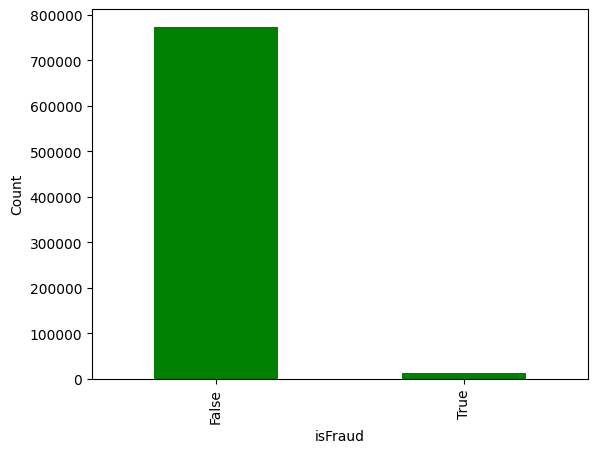

In [170]:
ax = df['isFraud'].value_counts().plot(kind='bar', color="green")
plt.xlabel("isFraud")
plt.ylabel("Count")
plt.show()

In [112]:
def customised_box_plot(columns,colors):
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,4))
    sns.boxplot(data=df, x=columns, ax=ax, color=colors, orient='v')
    ax.set_xlabel(columns, fontsize=6)
    ax.set_ylabel('')
    plt.suptitle('Numerical Data Distribution', fontsize=5)
    fig.subplots_adjust(top=0.95)
    
    
def understanding_boxplot(columns, start_IQR, end_IQR):   
    print("Below 25% of the Data")
    print(df[df["creditLimit"]<start_IQR]["creditLimit"].value_counts(),"\n")
    
    print("Above 75% of the Data")
    print(df[df["creditLimit"]>end_IQR]["creditLimit"].value_counts(),"\n")

    print("Percentage of Outliers less than IQR",len(df[df["creditLimit"]<start_IQR]["creditLimit"])/len(df))
    print("Percentage of Outliers greater than IQR",len(df[df["creditLimit"]>end_IQR]["creditLimit"])/len(df))


/Users/yamini/Library/Python/3.8/lib/python/site-packages/seaborn/_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


count    786363.000000
mean      10759.464459
std       11636.174890
min         250.000000
25%        5000.000000
50%        7500.000000
75%       15000.000000
max       50000.000000
Name: creditLimit, dtype: float64

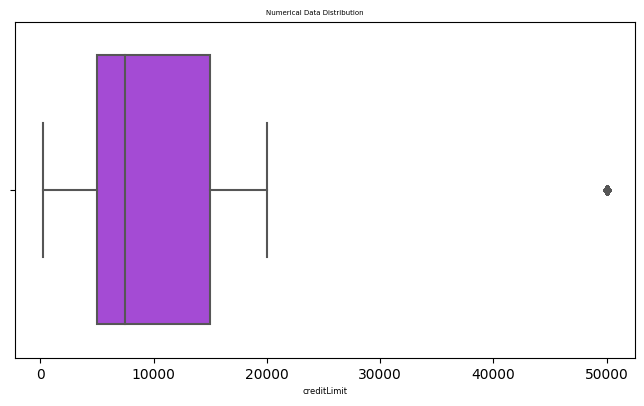

In [113]:
columns = 'creditLimit'
colors = '#ab34eb'
customised_box_plot(columns,colors)
df["creditLimit"].describe()

##### It shows that there are a couple of outliers and though median is less than $10k the mean is around 10,759 which shows the count of outliers that are affecting the mean

In [66]:
understanding_boxplot("creditLimit",5000,15000)

Below 25% of the Data
2500    75429
1000    36430
250     34025
500     27097
Name: creditLimit, dtype: int64 

Above 75% of the Data
20000    68629
50000    48781
Name: creditLimit, dtype: int64 

Percentage of Outliers less than IQR 0.21997601616556223
Percentage of Outliers greater than IQR 0.14930763527785515


##### This is understandable as creditLimit increases based on your credit score so less than 15% of them have a credit limit of $15k and more

/Users/yamini/Library/Python/3.8/lib/python/site-packages/seaborn/_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


count    786363.000000
mean       6250.725369
std        8880.783989
min       -1005.630000
25%        1077.420000
50%        3184.860000
75%        7500.000000
max       50000.000000
Name: availableMoney, dtype: float64

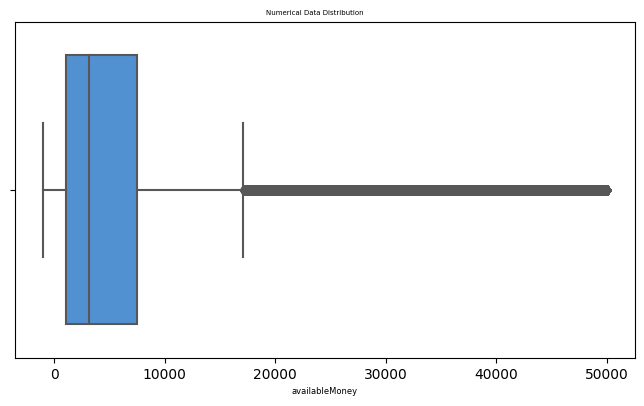

In [67]:
columns = 'availableMoney'
colors = '#3C91E6'
customised_box_plot(columns,colors)
df["availableMoney"].describe()

#### Observation
Available balance is negative which is a little absurd, does that mean they have taken loan and are due to the payment, also have to figure out what kind of bank account is this?


Your available balance is the amount of money in your account, minus any credits or debts that have not fully posted to the account yet. This is the amount of money you can spend, but it may fully reflect the money you have at your disposal. 

#### Conclusion
But Since currentBalance is positive for these transactions it looks like few of the pending transactions are going to bounce as available money will go negative if all transactions are successful
- Either the user has used money more than available in his/her account
- The transaction has some issue like fraud or multiple times money will be deducted


https://www.usbank.com/customer-service/knowledge-base/KB0180641.html#:~:text=It's%20the%20amount%20you%20have,authorizations%20and%20holds%20on%20funds.

In [109]:
print(" Available Money Is In Negative")
df1_negative_balance = df[df["availableMoney"]<0]
display(df1_negative_balance)
display(getDfSummary_float_int(df1_negative_balance))
display(getDfSummary_bool_object(df1_negative_balance))

 Available Money Is In Negative


,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud
1806,863358589,863358589,2500,-36.02,2016-04-12T19:45:47,136.03,Shake Shack #662166,US,US,5.0,...,2014-02-15,2014-02-15,779,779,787,PURCHASE,2536.02,True,False,False
2540,222396921,222396921,250,-30.48,2016-06-23T09:40:44,147.10,Dairy Queen #459261,US,US,2.0,...,2015-02-27,2016-06-05,307,307,8753,PURCHASE,280.48,True,False,False
3151,749990456,749990456,500,-27.28,2016-10-12T06:35:13,521.31,Washington News,US,US,5.0,...,2014-03-17,2014-03-17,529,529,1703,PURCHASE,527.28,False,False,False
3721,715152804,715152804,250,-95.46,2016-04-09T07:42:05,353.44,Boston Cafe #592935,US,US,2.0,...,2012-11-19,2012-11-19,956,956,764,PURCHASE,345.46,True,False,False
3722,715152804,715152804,250,-327.23,2016-04-12T15:00:27,18.47,South BBQ,US,US,2.0,...,2012-11-19,2012-11-19,215,215,518,REVERSAL,577.23,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
783398,772199703,772199703,500,-60.71,2016-01-17T22:38:34,29.89,Mobile eCards,US,US,2.0,...,2011-01-04,2011-01-04,906,906,7925,PURCHASE,560.71,False,False,False
783460,772199703,772199703,500,-35.04,2016-07-06T17:02:32,82.26,sears.com,US,US,5.0,...,2011-01-04,2011-01-04,906,906,7925,PURCHASE,535.04,False,False,False
785872,428856030,428856030,250,-6.65,2016-07-02T22:30:23,57.22,Renaissance Hotel #450302,US,US,5.0,...,2009-08-17,2009-08-17,416,416,3733,PURCHASE,256.65,True,False,False
785892,428856030,428856030,250,-93.06,2016-09-01T18:57:43,174.40,Rodeway Inn #88756,US,US,5.0,...,2009-08-17,2009-08-17,416,416,3733,PURCHASE,343.06,False,False,False


,Variable,count,number_nan,mean,max,min,std,25%,50%,75%
0,accountNumber,2931.0,0,5.016173e+08,9.982729e+08,1.007378e+08,2.608457e+08,2.851333e+08,4.816706e+08,7.416005e+08
1,customerId,2931.0,0,5.016173e+08,9.982729e+08,1.007378e+08,2.608457e+08,2.851333e+08,4.816706e+08,7.416005e+08
2,creditLimit,2931.0,0,4.781644e+02,7.500000e+03,2.500000e+02,6.057116e+02,2.500000e+02,2.500000e+02,5.000000e+02
3,availableMoney,2931.0,0,-1.335075e+02,-1.000000e-02,-1.005630e+03,1.388528e+02,-1.778150e+02,-9.222000e+01,-3.977000e+01
4,transactionAmount,2931.0,0,1.394590e+02,1.338250e+03,0.000000e+00,1.512908e+02,3.528000e+01,9.054000e+01,1.952400e+02
5,posEntryMode,2916.0,15,8.588820e+00,9.000000e+01,2.000000e+00,1.587825e+01,5.000000e+00,5.000000e+00,9.000000e+00
6,posConditionCode,2931.0,0,3.221085e+00,9.900000e+01,1.000000e+00,9.944088e+00,1.000000e+00,1.000000e+00,1.000000e+00
7,cardCVV,2931.0,0,5.407349e+02,9.970000e+02,1.000000e+02,2.669033e+02,2.760000e+02,5.350000e+02,7.800000e+02
8,enteredCVV,2931.0,0,5.403859e+02,9.970000e+02,4.900000e+01,2.671322e+02,2.750000e+02,5.350000e+02,7.800000e+02
9,cardLast4Digits,2931.0,0,4.826838e+03,9.998000e+03,0.000000e+00,2.868912e+03,2.549000e+03,4.904000e+03,7.051000e+03


,Variable,count,number_nan,unique,top,freq
0,transactionDateTime,2931,0,2931,2016-04-12T19:45:47,1
1,merchantName,2931,0,786,amazon.com,82
2,acqCountry,2913,18,4,US,2887
3,merchantCountryCode,2929,2,4,US,2903
4,merchantCategoryCode,2931,0,19,online_retail,833
5,currentExpDate,2931,0,165,05/2027,26
6,accountOpenDate,2931,0,392,2015-12-22,109
7,dateOfLastAddressChange,2931,0,509,2016-01-06,66
8,transactionType,2929,2,3,PURCHASE,2759
9,cardPresent,2931,0,2,False,1558


In [87]:
understanding_boxplot("availableMoney",1078,7500)

Below 25% of the Data
1000    36430
250     34025
500     27097
Name: creditLimit, dtype: int64 

Above 75% of the Data
15000    139307
20000     68629
10000     56889
50000     48781
Name: creditLimit, dtype: int64 

Percentage of Outliers less than IQR 0.12405466686504833
Percentage of Outliers greater than IQR 0.39880564065196356


/Users/yamini/Library/Python/3.8/lib/python/site-packages/seaborn/_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


count    786363.000000
mean        136.985791
std         147.725569
min           0.000000
25%          33.650000
50%          87.900000
75%         191.480000
max        2011.540000
Name: transactionAmount, dtype: float64

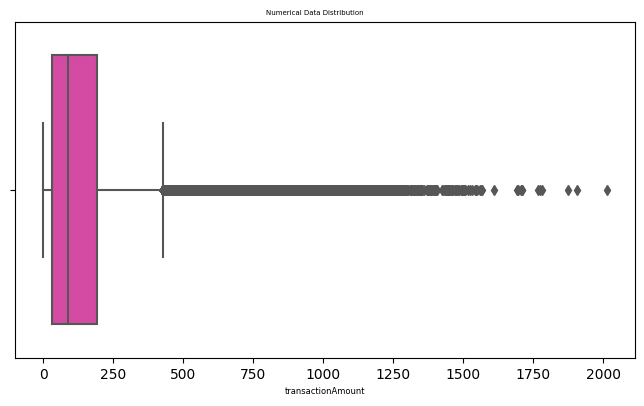

In [90]:
columns = 'transactionAmount'
colors = '#eb34ab'
customised_box_plot(columns,colors)
df["transactionAmount"].describe()

#### Observations
1. Expected as people would spend small transaction amount easily and a lot more than big transaction amount which is far and few in the plot above

2. But transaction amount being 0 is something weird as if there is no transaction amount involved then why that entry in the database?


#### Hypothesis
For transaction amount being 0
- Either some coupon that was added that reduced the amount to 0
- It was used by a merchant to request a Tokenised Card Number without presenting the transaction for authorisation so the TransactionType should say that

https://developer.pxp-solutions.com/docs/zero-value-transaction

In [111]:
df1_zero_transaction_amt = df[df["transactionAmount"]==0]
df1_zero_transaction_amt["transactionAmount"].value_counts()
print(" 0 Transaction Amount details")
display(getDfSummary_float_int(df1_zero_transaction_amt))
print("\n\nFor Transaction Type Details")
display(getDfSummary_bool_object(df1_zero_transaction_amt))

 0 Transaction Amount details


,Variable,count,number_nan,mean,max,min,std,25%,50%,75%
0,accountNumber,22225.0,0,5.349235e+08,999283629.0,1.003280e+08,2.532486e+08,3.297486e+08,5.074561e+08,7.633776e+08
1,customerId,22225.0,0,5.349235e+08,999283629.0,1.003280e+08,2.532486e+08,3.297486e+08,5.074561e+08,7.633776e+08
2,creditLimit,22225.0,0,1.061793e+04,50000.0,2.500000e+02,1.141517e+04,5.000000e+03,7.500000e+03,1.500000e+04
3,availableMoney,22225.0,0,6.111691e+03,50000.0,-5.412500e+02,8.558657e+03,1.053660e+03,3.156710e+03,7.493950e+03
4,transactionAmount,22225.0,0,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
5,posEntryMode,22130.0,95,9.376457e+00,90.0,2.000000e+00,1.759771e+01,2.000000e+00,5.000000e+00,9.000000e+00
6,posConditionCode,22216.0,9,3.191754e+00,99.0,1.000000e+00,9.509239e+00,1.000000e+00,1.000000e+00,1.000000e+00
7,cardCVV,22225.0,0,5.450011e+02,998.0,1.000000e+02,2.626828e+02,3.050000e+02,5.390000e+02,7.900000e+02
8,enteredCVV,22225.0,0,5.446290e+02,998.0,0.000000e+00,2.627782e+02,3.050000e+02,5.380000e+02,7.890000e+02
9,cardLast4Digits,22225.0,0,4.738605e+03,9998.0,0.000000e+00,2.982566e+03,2.178000e+03,4.679000e+03,7.307000e+03




For Transaction Type Details


,Variable,count,number_nan,unique,top,freq
0,transactionDateTime,22225,0,22215,2016-08-04T16:22:41,2
1,merchantName,22225,0,1949,Uber,753
2,acqCountry,22085,140,4,US,21902
3,merchantCountryCode,22184,41,4,US,22001
4,merchantCategoryCode,22225,0,19,online_retail,5788
5,currentExpDate,22225,0,165,08/2030,176
6,accountOpenDate,22225,0,1433,2014-06-21,989
7,dateOfLastAddressChange,22225,0,1738,2016-06-08,119
8,transactionType,22225,0,3,ADDRESS_VERIFICATION,20169
9,cardPresent,22225,0,2,False,22214


#### Conclusion
Matches Conclusion as 20169 out of 22225 is Address Verification

/Users/yamini/Library/Python/3.8/lib/python/site-packages/seaborn/_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


count    786363.000000
mean       4508.739089
std        6457.442068
min           0.000000
25%         689.910000
50%        2451.760000
75%        5291.095000
max       47498.810000
Name: currentBalance, dtype: float64

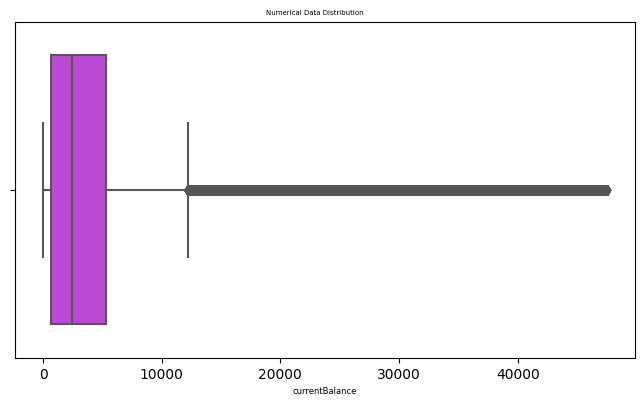

In [91]:
columns = 'currentBalance'
colors = '#c934eb'
customised_box_plot(columns,colors)
df["currentBalance"].describe()

In [128]:
print("One account has multiple cards")
df[df["cardLast4Digits"]==8522]["accountNumber"].value_counts()

One account has multiple cards


469398794    207
574788567     37
Name: accountNumber, dtype: int64

#### Observations
Expected as majority of people would have less available balance and huge amount as available balance would be far and less.



#### Summarising
Expected Behavior
- CreditLimit increases based on your credit score so less than 15% of them have a credit limit of $15k and more¶
- Majority of people would spend small transactionAmount easily and a lot more than big transaction amount which is far and few in the plot above
- Majority of people would have less available balance and huge amount as available balance would be far and less
- One account has multple cards

Questionable Behavior
- Available balance is negative
1. Either the user has used money more than available in his/her account
2. The transaction has some issue like fraud or multiple times money will be deducted

- For transaction amount being 0

1. Either some coupon that was added that reduced the amount to 0
2. It was used by a merchant to request a Tokenised Card Number without presenting the transaction for authorisation so the TransactionType should say that - True as around 95% were Address_Verification TransactionType